In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib
from matplotlib.ticker import FormatStrFormatter

sys.path.append('..')
from plotting import get_cubehelix_palette, get_line_style

/mnt/home/snakoneczny/tools/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100
sns.set(style='whitegrid')

In [4]:
def plot_histories(history_top, history_rnd, idx_start=0, title=None, y_label=None, n_round=None):
    color_palette = get_cubehelix_palette(2, reverse=False)
    linewidth = 1.5

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    ax1.set_xlabel('number of trees')
    ax1.set_ylabel(y_label)

    to_plot = [
        (history_top, r'faint extrapolation test, $r \in(21.3, 22)$', ax1),
        (history_random, r'random test, $r < 21.3$', ax2),
    ]

    plotted_arr = []
    for i, (data, label, ax) in enumerate(to_plot):    
        color = color_palette[i]
        linestyle = get_line_style(i)
        plotted, = ax.plot(np.arange(idx_start, len(data)), data[idx_start:], color=color,
                           label=label, linestyle=linestyle, linewidth=linewidth)
        ax.tick_params(axis='y', labelcolor=color)

        plotted_arr.append(plotted)

    # Make aligned grids
    ax1.grid()
    ax1.xaxis.grid(True)
    ax1_min, ax1_max, ax2_min, ax2_max = ax1.get_ybound()[0], ax1.get_ybound()[1], ax2.get_ybound()[0], ax2.get_ybound()[1]
    offset = 0.04
    offset_1 = offset * (ax1_max - ax1_min)
    offset_2 = offset * (ax2_max - ax2_min)
    ax1.set_yticks(np.linspace(ax1_min + offset_1, ax1_max - offset_1, 8))
    ax2.set_yticks(np.linspace(ax2_min + offset_2, ax2_max - offset_2, 8))
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.{}f'.format(n_round)))
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.{}f'.format(n_round)))

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    legend = plt.legend(handles=plotted_arr, loc='upper right', framealpha=1.0)
    plt.title(title)

    plt.show()

# XGBoost classification

In [5]:
xgb_clf = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_xgb_clf_f-all__2020-06-08_12:12:59.joblib')

In [6]:
history_top = xgb_clf.evals_result()['validation_0']['merror']
history_random = xgb_clf.evals_result()['validation_1']['merror']

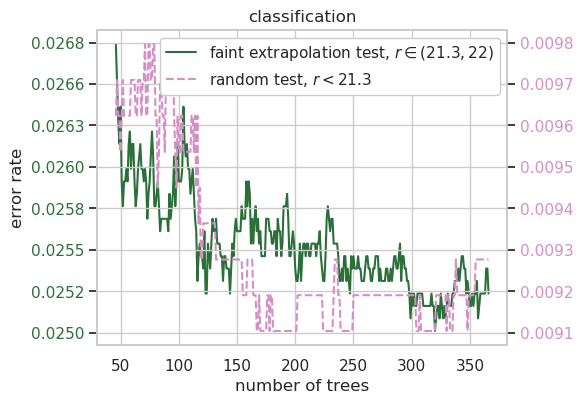

In [13]:
plot_histories(history_top, history_random, idx_start=46, title='classification',
               y_label='error rate', n_round=4)

# XGBoost redshift QSO

In [14]:
xgb_z_qso = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_xgb_z_f-all_spec-qso__2020-06-08_12:03:46.joblib')

In [15]:
history_top = xgb_z_qso.evals_result()['validation_0']['rmse']
history_random = xgb_z_qso.evals_result()['validation_1']['rmse']

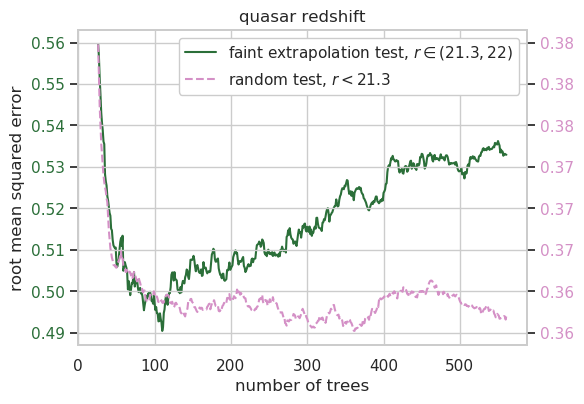

In [20]:
plot_histories(history_top, history_random, idx_start=26, title='quasar redshift',
               y_label='root mean squared error', n_round=2)

# XGBoost redshift galaxy

In [27]:
model_z_galaxy = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_xgb_z_f-all_spec-galaxy__2020-06-08_13:27:02.joblib')

In [28]:
history_top = model_z_galaxy.evals_result()['validation_0']['rmse']
history_random = model_z_galaxy.evals_result()['validation_1']['rmse']

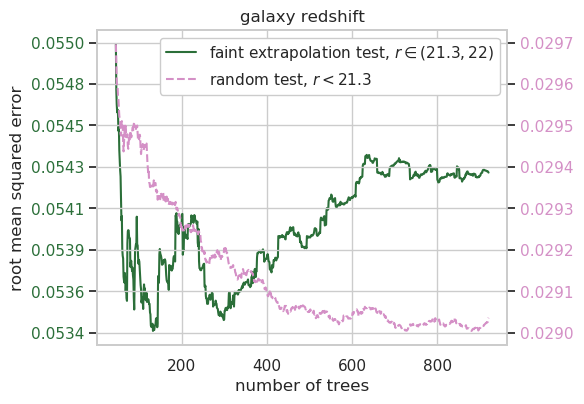

In [30]:
plot_histories(history_top, history_random, idx_start=46, title='galaxy redshift',
               y_label='root mean squared error', n_round=4)